In [1]:
#Added this to show graphs in the notebook
%matplotlib inline

In [2]:
#import the pandas library
#  so we can run analysis later
import pandas as pd
import numpy as np

In [3]:
#load the baby names from 1880
#  via the pandas.read_csv method
#Arguments:
#  file name- the name of the file to be opened
#  names- the column headers
names1880 = pd.read_csv('baby_names/yob1880.txt', names=['name', 'sex', 'births'])

In [4]:
#display the names from 1880
names1880

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
5,Margaret,F,1578
6,Ida,F,1472
7,Alice,F,1414
8,Bertha,F,1320
9,Sarah,F,1288


In [5]:
#Get the count of births by sex
#  this is done through the group by method
#  and then calling sum
names1880.groupby('sex').births.sum()

sex
F     90992
M    110490
Name: births, dtype: int64

In [6]:
#Here we load all of the files of baby names
#  into a pandas data frame

#2015 is the last year. Because of the way the counter works
#  it will be necessary to go to 2016 in the bellow array.
#  Since the loop checks for < year and not <= year
years = range(1880,2016)

#create an empty array to store data in
pieces = []
#define column headers
columns = ['name', 'sex', 'births']

#loop through years and save them into the pieces array
#  in addition we will add the year to each entry for later filtering
for year in years:
    #build path to file
    path = 'baby_names/yob%d.txt' % year
    #read file in
    frame = pd.read_csv(path, names=columns)
    
    #append year to each entry in the csv for filtering
    frame['year'] = year
    #append frame to pieces frame
    pieces.append(frame)
    
#convert everything into a single data frame
names = pd.concat(pieces, ignore_index=True)

In [7]:
#print out the names data frame
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
5,Margaret,F,1578,1880
6,Ida,F,1472,1880
7,Alice,F,1414,1880
8,Bertha,F,1320,1880
9,Sarah,F,1288,1880


In [8]:
#create a pivot table that groups by year and gender
#NOTE: the code in the book was wrong it was necessary to change
#       rows to index and cols to columns
total_births = names.pivot_table('births', index='year',
                                columns='sex', aggfunc=sum)

In [9]:
#print the last five rows of the table
total_births.tail()

sex,F,M
year,,
2011,1754424,1894262
2012,1755254,1890889
2013,1747544,1883945
2014,1777242,1910876
2015,1769325,1898858


#### Figure 2-4 Below

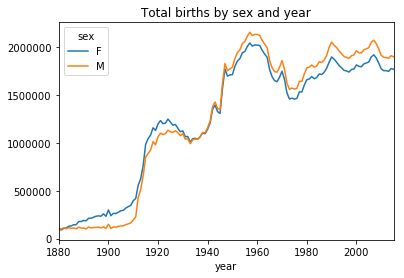

In [10]:
#plot the total births by sex and year
total_births.plot(title='Total births by sex and year')

In [11]:
#Now an additional column is added which calculates the number
# of births with a particular name in relation to the total
# births for that year. Example: 0.05 would mean 5 out of 100
# babies got a particular name that year
#The data will be grouped by year and then sex before the new
# column is calculated
def add_prop(group):
    #Convert births to float to prevent integer division problems
    births = group.births.astype(float)
    
    group['prop'] = births/births.sum()
    return group
names = names.groupby(['year', 'sex']).apply(add_prop)

In [12]:
#display names with the new field added
names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077644
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021310
4,Minnie,F,1746,1880,0.019189
5,Margaret,F,1578,1880,0.017342
6,Ida,F,1472,1880,0.016177
7,Alice,F,1414,1880,0.015540
8,Bertha,F,1320,1880,0.014507
9,Sarah,F,1288,1880,0.014155


In [13]:
#In this case you may want to check to make sure that
# the proportions add up to 1. This is done using the
# allclose method to make sure that they come fairly
# close to 1 as with floating point numbers they sometimes
# do not add up to exactly 1
np.allclose(names.groupby(['year', 'sex']).prop.sum(), 1)

True

In [14]:
#Get the top 1000 names for each sex and year combination.
# this is done to filter down the results to make them more
# manageable as some names have a very low count such as Zyus
# from 2015 that only had 5 kids with that name
#NOTE: converted sort_inex to sort_values to remove deprecated error
def get_top1000(group):
    return group.sort_values(by='births', ascending=False)[:1000]

#group names by year and sex
grouped = names.groupby(['year', 'sex'])
#get the top 1000 names for each year/sex combination
top1000 = grouped.apply(get_top1000)

In [15]:
#display top 1000 names for each sex/year combination
top1000

name sex  births  year      prop
year sex                                               
1880 F   0             Mary   F    7065  1880  0.077644
         1             Anna   F    2604  1880  0.028618
         2             Emma   F    2003  1880  0.022013
         3        Elizabeth   F    1939  1880  0.021310
         4           Minnie   F    1746  1880  0.019189
         5         Margaret   F    1578  1880  0.017342
         6              Ida   F    1472  1880  0.016177
         7            Alice   F    1414  1880  0.015540
         8           Bertha   F    1320  1880  0.014507
         9            Sarah   F    1288  1880  0.014155
         10           Annie   F    1258  1880  0.013825
         11           Clara   F    1226  1880  0.013474
         12            Ella   F    1156  1880  0.012704
         13        Florence   F    1063  1880  0.011682
         14            Cora   F    1045  1880  0.011485
         15          Martha   F    1040  1880  0.011430
         16           Laura   F    1012  1880  0.011122
         17          Nellie   F     995  1880  0.010935
         18           Grace   F     982  1880  0.010792
         19          Carrie   F     949  1880  0.010429
         20           Maude   F     858  1880  0.009429
         21           Mabel   F     808  1880  0.008880
         22          Bessie   F     796  1880  0.008748
         23          Jennie   F     793  1880  0.008715
         24        Gertrude   F     787  1880  0.008649
         25           Julia   F     783  1880  0.008605
         26          Hattie   F     769  1880  0.008451
         27           Edith   F     768  1880  0.008440
         28          Mattie   F     704  1880  0.007737
         29            Rose   F     700  1880  0.007693
...                     ...  ..     ...   ...       ...
2015 M   1845703     Yadiel   M     211  2015  0.000111
         1845704      Yahya   M     211  2015  0.000111
         1845700     Aarush   M     211  2015  0.000111
         1845702      Robin   M     211  2015  0.000111
         1845701   Deangelo   M     211  2015  0.000111
         1845705      Boden   M     209  2015  0.000110
         1845707        Kye   M     209  2015  0.000110
         1845708      Kylen   M     209  2015  0.000110
         1845709       Todd   M     209  2015  0.000110
         1845710     Truman   M     209  2015  0.000110
         1845706        Ean   M     209  2015  0.000110
         1845712    Gilbert   M     208  2015  0.000110
         1845713     Haiden   M     208  2015  0.000110
         1845711      Chevy   M     208  2015  0.000110
         1845715    Dangelo   M     207  2015  0.000109
         1845716      Juelz   M     207  2015  0.000109
         1845717    Osvaldo   M     207  2015  0.000109
         1845714    Brixton   M     207  2015  0.000109
         1845718     Bishop   M     206  2015  0.000108
         1845719     Freddy   M     206  2015  0.000108
         1845720     Reagan   M     206  2015  0.000108
         1845721    Frankie   M     205  2015  0.000108
         1845722     Malaki   M     205  2015  0.000108
         1845725    Jayvion   M     204  2015  0.000107
         1845726      Leroy   M     204  2015  0.000107
         1845724    Deshawn   M     204  2015  0.000107
         1845723     Camren   M     204  2015  0.000107
         1845728     Jaydon   M     203  2015  0.000107
         1845727      Briar   M     203  2015  0.000107
         1845730       Ayan   M     202  2015  0.000106

[271877 rows x 5 columns]

## Analyzing Naming Trends
At this point naming trends are analyzed for the top 1000 males and females
The first step is to split the top1000 into male and female sets of data

In [16]:
#split the boys into a seperate variable
boys = top1000[top1000.sex == 'M']

In [17]:
#split the girls into a seperate variable
girls = top1000[top1000.sex == 'F']

In [18]:
#In order to perform any analysis on the names as
# they compare to the year it will be necessary
# to group the data first by year and then name
#NOTE: inorder to supress a future warning I also had
#  reset the indexes on top1000
#NOTE: I had to change rows to index and cols to
#  columns
top1000.reset_index(drop=True,inplace=True)
total_births = top1000.pivot_table('births', index='year', columns='name',
                                  aggfunc=sum)

In [19]:
#Display the new chart
total_births

name,Aaden,Aaliyah,Aanya,Aarav,Aaron,Aarush,Ab,Abagail,Abb,Abbey,...,Zoa,Zoe,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula,Zuri
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,NaN,102.0,NaN,NaN,NaN,NaN,NaN,...,8.0,23.0,NaN,NaN,7.0,NaN,8.0,28.0,27.0,NaN
1881,NaN,NaN,NaN,NaN,94.0,NaN,NaN,NaN,NaN,NaN,...,NaN,22.0,NaN,NaN,10.0,NaN,9.0,21.0,27.0,NaN
1882,NaN,NaN,NaN,NaN,85.0,NaN,NaN,NaN,NaN,NaN,...,8.0,25.0,NaN,NaN,9.0,NaN,17.0,32.0,21.0,NaN
1883,NaN,NaN,NaN,NaN,105.0,NaN,NaN,NaN,NaN,NaN,...,NaN,23.0,NaN,NaN,10.0,NaN,11.0,35.0,25.0,NaN
1884,NaN,NaN,NaN,NaN,97.0,NaN,NaN,NaN,NaN,NaN,...,13.0,31.0,NaN,NaN,14.0,6.0,8.0,58.0,27.0,NaN
1885,NaN,NaN,NaN,NaN,88.0,NaN,6.0,NaN,NaN,NaN,...,6.0,27.0,NaN,NaN,12.0,6.0,14.0,48.0,38.0,NaN
1886,NaN,NaN,NaN,NaN,86.0,NaN,NaN,NaN,NaN,NaN,...,13.0,25.0,NaN,NaN,8.0,NaN,20.0,52.0,43.0,NaN
1887,NaN,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,...,9.0,34.0,NaN,NaN,23.0,NaN,28.0,46.0,33.0,NaN
1888,NaN,NaN,NaN,NaN,90.0,NaN,NaN,NaN,NaN,NaN,...,11.0,42.0,NaN,NaN,23.0,7.0,30.0,42.0,45.0,NaN


In [20]:
#Subest the data for just John, Harry, Mary, and Marilyn
#This will give us just the number of births each year
#  for those names.
subset = total_births[['John', 'Harry', 'Mary', 'Marilyn']]

#### Figure 2-5 Below

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002103C3BB630>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000002103D94AEB8>], dtype=object)

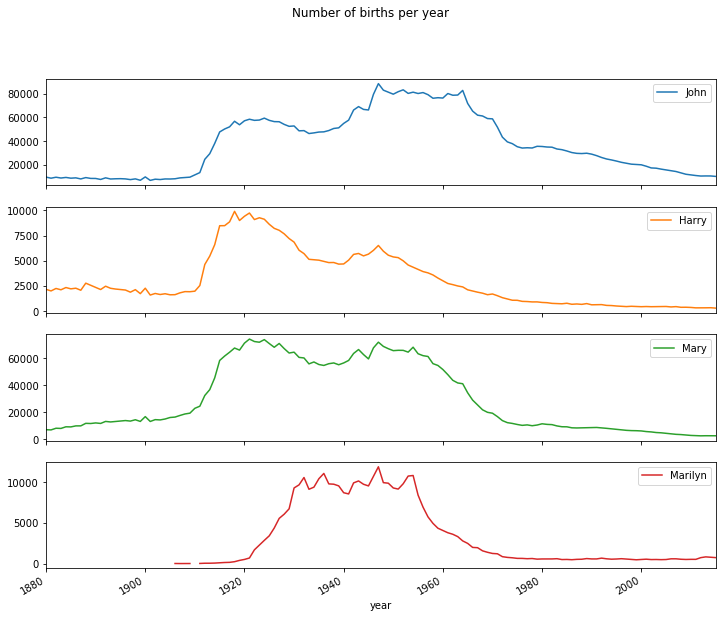

In [21]:
#Plot the number of births for each name with one graph
#  on top of the other
subset.plot(subplots=True, figsize=(12,10), grid=False,
           title="Number of births per year")

### Naming Diversity
If you look at the graphs above the number of babies born with what seem to be common names is decreasing.

This could be because parents are starting to choose less common names. This next section examines that theory

In [22]:
#Group top 1000 names by year and sex summing the proportion field
#NOTE: I had to change rows to index and cols to
#  columns
table = top1000.pivot_table('prop', index='year',
                           columns='sex', aggfunc=sum)

#### Figure 2-6 Below

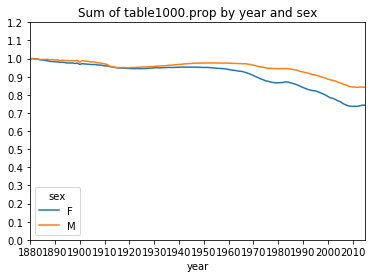

In [23]:
#Plot the prop field by year and sex
table.plot(title="Sum of table1000.prop by year and sex",
          yticks=np.linspace(0,1.2,13), xticks=range(1880,2020,10))

In [24]:
#get boys names from just the year 2010
df = boys[boys.year == 2010]

In [25]:
#display the names of boys from 2010
df

name sex  births  year      prop
year sex                                                 
2010 M   1677509        Jacob   M   22095  2010  0.011540
         1677510        Ethan   M   17993  2010  0.009398
         1677511      Michael   M   17324  2010  0.009048
         1677512       Jayden   M   17158  2010  0.008962
         1677513      William   M   17036  2010  0.008898
         1677514    Alexander   M   16746  2010  0.008746
         1677515         Noah   M   16438  2010  0.008585
         1677516       Daniel   M   15819  2010  0.008262
         1677517        Aiden   M   15520  2010  0.008106
         1677518      Anthony   M   15475  2010  0.008083
         1677519       Joshua   M   15425  2010  0.008056
         1677520        Mason   M   14836  2010  0.007749
         1677521  Christopher   M   14259  2010  0.007447
         1677522       Andrew   M   14227  2010  0.007431
         1677523        David   M   14176  2010  0.007404
         1677524      Matthew   M   14114  2010  0.007372
         1677525        Logan   M   14014  2010  0.007319
         1677526       Elijah   M   13875  2010  0.007247
         1677527        James   M   13861  2010  0.007240
         1677528       Joseph   M   13806  2010  0.007211
         1677529      Gabriel   M   12859  2010  0.006716
         1677530     Benjamin   M   12421  2010  0.006487
         1677531         Ryan   M   11964  2010  0.006249
         1677532       Samuel   M   11948  2010  0.006240
         1677533      Jackson   M   11812  2010  0.006169
         1677534         John   M   11543  2010  0.006029
         1677535       Nathan   M   11367  2010  0.005937
         1677536     Jonathan   M   11113  2010  0.005804
         1677537    Christian   M   11084  2010  0.005789
         1677538         Liam   M   10924  2010  0.005706
...                       ...  ..     ...   ...       ...
         1678480      Ronaldo   M     203  2010  0.000106
         1678481         Yair   M     203  2010  0.000106
         1678478         Kael   M     203  2010  0.000106
         1678482       Gibson   M     202  2010  0.000106
         1678483        Keyon   M     202  2010  0.000106
         1678484       Reagan   M     202  2010  0.000106
         1678485     Kingsley   M     201  2010  0.000105
         1678486        Talan   M     201  2010  0.000105
         1678487       Yehuda   M     201  2010  0.000105
         1678491       Jordon   M     200  2010  0.000104
         1678493        Slade   M     200  2010  0.000104
         1678492      Sheldon   M     200  2010  0.000104
         1678490       Daylen   M     200  2010  0.000104
         1678489      Dashawn   M     200  2010  0.000104
         1678488    Cristofer   M     200  2010  0.000104
         1678494     Clarence   M     199  2010  0.000104
         1678495        Kadin   M     199  2010  0.000104
         1678496        Masen   M     199  2010  0.000104
         1678497        Rowen   M     199  2010  0.000104
         1678498      Clinton   M     198  2010  0.000103
         1678499       Dillan   M     198  2010  0.000103
         1678500     Thaddeus   M     198  2010  0.000103
         1678501       Yousef   M     198  2010  0.000103
         1678502       Truman   M     197  2010  0.000103
         1678507       Joziah   M     196  2010  0.000102
         1678510       Simeon   M     196  2010  0.000102
         1678509       Reuben   M     196  2010  0.000102
         1678508      Keshawn   M     196  2010  0.000102
         1678504       Destin   M     196  2010  0.000102
         1678506        Enoch   M     196  2010  0.000102

[1000 rows x 5 columns]

In [26]:
#Find out what names make up the top 50% of
#  names. Sort the data frame by prom in descending order
#NOTE: change df.sort_index to df.sort_by to avoid
#  FutureWarning
prop_cumsum = df.sort_values(by='prop', ascending=False).prop.cumsum()

In [27]:
#Display the first 10 results in the data frame
prop_cumsum[:10]

year  sex         
2010  M    1677509    0.011540
           1677510    0.020938
           1677511    0.029986
           1677512    0.038947
           1677513    0.047845
           1677514    0.056592
           1677515    0.065177
           1677516    0.073439
           1677517    0.081545
           1677518    0.089628
Name: prop, dtype: float64

In [28]:
#Find out how many names it takes to make up the
#  top 50% of names
prop_cumsum.searchsorted(0.5)

array([116], dtype=int64)

In [29]:
#get the names of boys from 1900
df = boys[boys.year == 1900]

In [30]:
#Find out what names make up the top 50% of
#  names. Sort the data frame by prom in descending order
#NOTE: change df.sort_index to df.sort_by to avoid
#  FutureWarning
in1900 = df.sort_values(by='prop', ascending=False).prop.cumsum()

In [31]:
#Find out how many names it takes to make up the
#  top 50% of names
in1900.searchsorted(0.5)[0] + 1

25

In [32]:
#Get the top names for each year in the top 50%
#  build a function to run the calculations
def get_quantile_count(group, q=0.5):
    group = group.sort_values(by='prop', ascending=False)
    return group.prop.cumsum().searchsorted(q)[0] + 1

diversity = top1000.groupby(['year', 'sex']).apply(get_quantile_count)
diversity = diversity.unstack('sex')

In [33]:
#print the first 5 rows in diversity
diversity.head()

sex,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16


#### Figure 2-7 Below

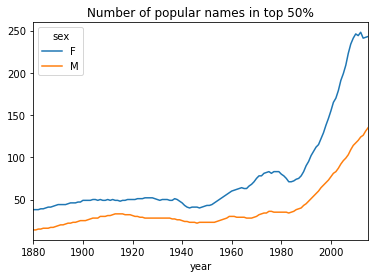

In [34]:
#Plot the number of top 50% of Male and Female names
diversity.plot(title='Number of popular names in top 50%')

### Last Letter of Name
Over the last few years researchers have noticed that the last letter of the name has changed over the years for males and females

This section looks that distribution

In [35]:
#Extract the last letter from the name column
get_last_letter = lambda x: x[-1]
last_letters = names.name.map(get_last_letter)
last_letters.name = 'last_letter'

table =names.pivot_table('births', index = last_letters,
                        columns = ['sex', 'year'], aggfunc=sum)

In [36]:
#Choose three years spanning the history
subtable = table.reindex(columns=[1910,1960,2010], level='year')

In [37]:
#Print first 5 rows of the table
subtable.head()

sex                 F                            M                    
year             1910      1960      2010     1910      1960      2010
last_letter                                                           
a            108398.0  691271.0  676151.0    977.0    5212.0   28837.0
b                 NaN     694.0     454.0    411.0    3912.0   39229.0
c                 5.0      49.0     954.0    482.0   15463.0   23325.0
d              6751.0    3728.0    2635.0  22113.0  262168.0   44780.0
e            133601.0  435056.0  316425.0  28665.0  178817.0  130130.0

In [38]:
#Normalize the table to get a count of total births for each sex and year
subtable.sum()

sex  year
F    1910     396503.0
     1960    2022121.0
     2010    1773440.0
M    1910     194216.0
     1960    2132756.0
     2010    1914629.0
dtype: float64

In [39]:
#Calculate the letter proportion
letter_prop = subtable / subtable.sum().astype(float)

#### Figure 2-8 Below

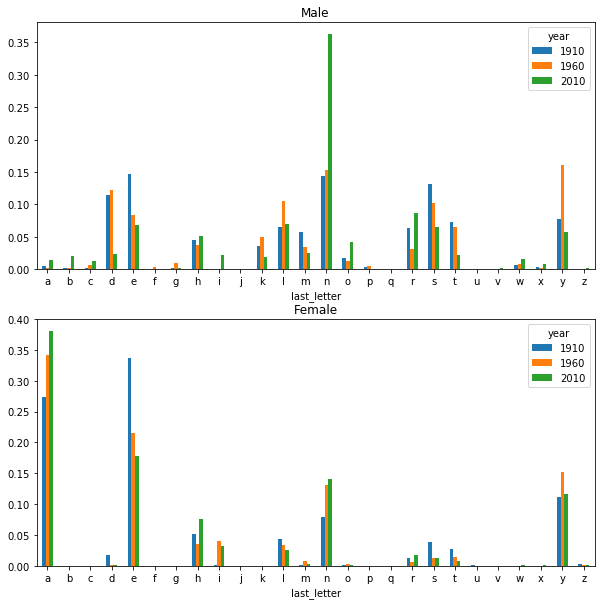

In [40]:
#Build a bar plot for each sex with a graph of the proportion of each
#  letter for each of the three years

#Import matplotlib for creating the graph
import matplotlib.pyplot as plt

#Configure graph axis and graph plots (2x1 graph)
fib, axes = plt.subplots(2, 1, figsize=(10, 10))
#Create plots
letter_prop['M'].plot(kind='bar', rot=0, ax=axes[0], title='Male')
letter_prop['F'].plot(kind='bar', rot=0, ax=axes[1], title='Female')

In [41]:
#Renormalize prop values for each letter
letter_prop = table / table.sum().astype(float)

In [42]:
#Filter out the letters d, n, and y for males
#NOTE: changed .ix to .loc to avoid FutureWarning
dny_ts = letter_prop.loc[['d', 'n', 'y'], 'M'].T

In [43]:
dny_ts.head()

last_letter,d,n,y
year,,,
1880,0.083057,0.153217,0.075763
1881,0.083242,0.153212,0.077455
1882,0.085332,0.149561,0.077538
1883,0.084051,0.151653,0.079148
1884,0.086121,0.149926,0.080407


#### Figure 2-9 Below

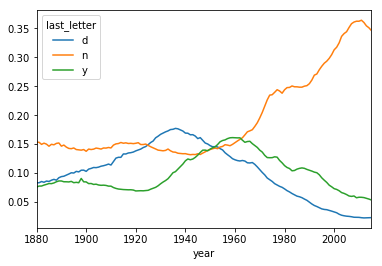

In [44]:
#Plot the proportion of boys with names
#  that end in d, n, and y
dny_ts.plot()

### Names that change gender
Every once in a while names change gender going from Male to Female, or vice versa. This section takes a look at the names like Lesley and Leslie.

In [45]:
#Get all the names in the dataset. This makes sure that
#  only unique names are saved
all_names = top1000.name.unique()

In [46]:
#Create a mask for names that match lesl.
# We also convert names to lowercase for ease of matching
mask = np.array(['lesl' in x.lower() for x in all_names])

In [47]:
#Apply the mask to all_names
lesley_like = all_names[mask]

In [48]:
#Display lesley_like names
lesley_like

array(['Leslie', 'Lesley', 'Leslee', 'Lesli', 'Lesly'], dtype=object)

In [49]:
#Filter the top1000 names to just lesley_like names
filtered = top1000[top1000.name.isin(lesley_like)]

In [50]:
#Get counts of each lesley like name
filtered.groupby('name').births.sum()

name
Leslee       993
Lesley     35032
Lesli        929
Leslie    376034
Lesly      11431
Name: births, dtype: int64

In [51]:
#Aggregate each name by sex and year
table = filtered.pivot_table('births', index='year',
                            columns='sex', aggfunc='sum')

In [52]:
#Normalize each value within the year
# This gives us a proportion of how many
#   were male and female lesley like names  
table = table.div(table.sum(1), axis=0)

In [53]:
#Display the last 5 records
table.tail()

sex,F,M
year,,
2011,1.0,NaN
2012,1.0,NaN
2013,1.0,NaN
2014,1.0,NaN
2015,1.0,NaN


#### Figure 2-10 below

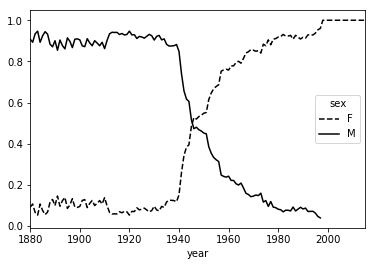

In [54]:
#Create the plot of breakdown by sex overtime
table.plot(style={'M': 'k-', 'F': 'k--'})